Biblioteki

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
import scipy.optimize as optim
from IPython.display import clear_output 
import time
warnings.filterwarnings('ignore')

#1. Obwód RC z wymuszeniem sinusoidalnym

Dane

In [ ]:
R = 1
C = 0.701

a = 1/(R*C);

Maksymalne napięcie na oporniku i kondensatorze po długim czasie w przypadku wymuszenia źródłem napięciowym
sinusoidalnym o amplitudzie 2V i częstościach:

- 0.1

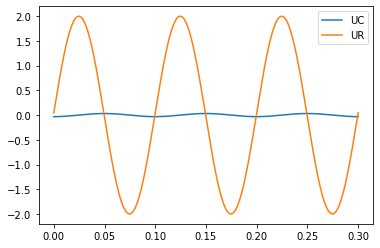

In [ ]:
w = (2*np.pi)/0.1
t = np.linspace(0, 3*2*np.pi/w, 500)

s = 2*(a*np.sin(w*t)-w*np.cos(w*t))/(w**2+a**2)
sd = 2*(a*w*np.cos(w*t)+w**2*np.sin(w*t))/(w**2+a**2)

fig,ax = plt.subplots()

ax.plot(t,s,t,sd)
plt.legend(["UC","UR"])

plt.show()

- 1

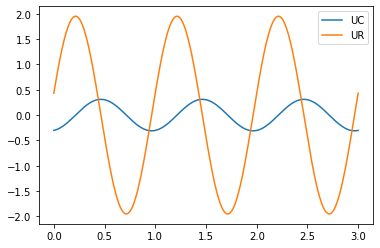

In [ ]:
w = (2*np.pi)/1
t = np.linspace(0, 3*2*np.pi/w, 500)

s = 2*(a*np.sin(w*t)-w*np.cos(w*t))/(w**2+a**2)
sd = 2*(a*w*np.cos(w*t)+w**2*np.sin(w*t))/(w**2+a**2)

fig,ax = plt.subplots()

ax.plot(t,s,t,sd)
plt.legend(["UC","UR"])

plt.show()

- 10

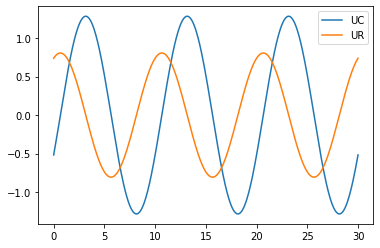

In [ ]:
w = (2*np.pi)/10
t = np.linspace(0, 3*2*np.pi/w, 500)

s = 2*(a*np.sin(w*t)-w*np.cos(w*t))/(w**2+a**2)
sd = 2*(a*w*np.cos(w*t)+w**2*np.sin(w*t))/(w**2+a**2)

fig,ax = plt.subplots()

ax.plot(t,s,t,sd)
plt.legend(["UC","UR"])

plt.show()

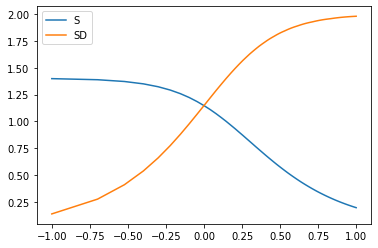

In [ ]:
log = []
s2 = []
sd2 = []

inv=np.linspace(0.1,10,100)

for w in inv:
  t = np.linspace(0, 2 * np.pi / w, 100)
  s1 = 2*(a*np.sin(w*t)-w*np.cos(w*t))/(w**2+a**2)
  sd1 = 2*(a*w*np.cos(w*t)+w*w*np.sin(w*t))/(w**2+a**2)
  s2.append(max(s1))
  sd2.append(max(sd1))
  log.append(np.log10(w))

fig,ax = plt.subplots()

ax.plot(log,s2,log,sd2)
plt.legend(["S", "SD"])

plt.show()

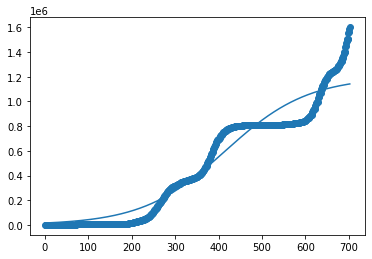

In [ ]:
data = pd.read_csv("/content/sample_data/hungary.csv", sep=",")
data = data['total_cases']

data = data.reset_index(drop=False)
data.columns = ["czas", "przypadki"]

def logistic(t, a, b, c):
  return c / (1 + a * np.exp(-b*t))
def logistic2(t):
  return c / (1 + a * np.exp(-b*t))

p0 = np.random.exponential(size=3)

bounds = (0, [100000., 3., 1000000000.])

x = np.array(data["czas"]) + 1
y = np.array(data["przypadki"])
(a,b,c),cov = optim.curve_fit(logistic, x, y, bounds=bounds, p0=p0)

plt.scatter(x, y)
plt.plot(x, logistic2(x))



In [ ]:
size = 10

def init(y,x):
  arr = [[0 for _ in range(y)] for _ in range(x)]
  arr[4][4] = 1
  arr[4][5] = 1
  return arr

def print_arr(arr):
  for y in range(size):
    for x in range(size):
      print(arr[x][y], end = " ")
    print(" ")

def cnt(y, x):
  dy=[0,0,1,-1]
  dx=[-1,1,0,0]
  cnt = 0
  for k in range(len(dx)):
    kx=(x+dx[k]) % size
    ky=(y+dy[k]) % size
    cnt=cnt+arr[ky][kx]
  return cnt

def close():
  closest=[[0 for _ in range(size)] for _ in range(size)]
  for y in range(size):
    for x in range(size):
      closest[y][x] = cnt(y,x)
  return closest

arr=init(size,size)
print_arr(arr)
time.sleep(3)
clear_output()

for x in range(size):
  closest = close()
  res=arr
  for y in range(size):
      for x in range(size):
        if arr[y][x] == 0:
          if closest[y][x]==1:
            arr[y][x]=1
  arr=res
  print_arr(arr)
  time.sleep(3)
  clear_output()

TypeError: ignored